In [3]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Loading the built-in IMDb review dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.imdb.load_data()

print('Training data shape: ', X_train.shape, ', ', Y_train.shape)
print('Test data shape: ', X_test.shape, ', ', Y_test.shape)

Training data shape:  (25000,) ,  (25000,)
Test data shape:  (25000,) ,  (25000,)


In [5]:
print(X_train[0])
print(X_test[250])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 142, 13, 104, 49, 84, 717, 44, 8

-> This shows that the data in the dataset is already integer encoded. Let's check if the length of every vector is same or not.

In [6]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))
print(len(X_test[0]), len(X_test[1]), len(X_test[2]))

218 189 141
68 260 603


-> Clearly, the length is not the same. So, we have to zero pad all the vectors to make them the same length.

In [7]:
# Applying zero padding
X_train = tf.keras.utils.pad_sequences(X_train, padding='post', maxlen=500)
X_test = tf.keras.utils.pad_sequences(X_test, padding='post', maxlen=500)

print('Training data shape: ', X_train.shape, ', ', Y_train.shape)
print('Test data shape: ', X_test.shape, ', ', Y_test.shape)

Training data shape:  (25000, 500) ,  (25000,)
Test data shape:  (25000, 500) ,  (25000,)


-> Now every vector in the training and test data has same length of 2494 . We can verify by again checking the length.

In [8]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))
print(len(X_test[0]), len(X_test[1]), len(X_test[2]))

500 500 500
500 500 500


In [9]:
# Checking the data after padding
print(X_train[250])
print(X_test[0])

[    1    18    72   175   418     7   498     9     8    30  6511    34
   134 11380   812  5239     5  1217 25038   186     8    30  4327     8
  4307   327   665     5   518   221   116     4   196   491  1969  1467
     6  5239    15     4   529   203  2233    11    34   309    88     7
  1892 16282     4    65   461     6 19295    35 22573   415  3188     8
    28  1137    21   518    12   505    46    29    47   164     8   135
    14    22  1421    40    35 22573   415    48    25    28    24   332
     4  3935    25   566    67    15    12    16     4  1720     5     4
  7146   888   138    15  1443 12528   650    23   113     5   166    41
  4735 21548    92    25  1128     8    72   758  1643 50664  2247   152
  1527    59    64   517   267     6   196    58    33    90   209   660
     6   681    51     9     4  5239     7    15   324    51   127    12
   384    61   888     9    40 69704    51    47    14    22     8   135
    51     9   981    34    14    20     4  1527   

In [10]:
# Checking the labels
print(Y_train[0], Y_train[1], Y_train[2])
print(Y_test[0], Y_test[1], Y_test[2])

1 0 0
0 1 1


-> This shows the sentiment of the sentences. '1' means positive sentiment, '0' means negative sentiment.

<hr>

## <b>Using Learned Embedding</b>

In [11]:
# Getting the vocabulary size
word_index = tf.keras.datasets.imdb.get_word_index()
vocab_size = len(word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 88585


In [13]:
# Building the RNN

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_shape=(2494,)),
    tf.keras.layers.SimpleRNN(32, return_sequences=False, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 2494, 64)            │       5,669,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,672,577 (21.64 MB)

 Trainable params: 5,672,577 (21.64 MB)

 Non-trainable params: 0 (0.00 B)

-> 88585x64 = 5,669,440
(64x32 + 32) + (32x32) = 3104 <br>
32x1 + 1 = 33

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
   X_train, Y_train,
   epochs = 10,
   validation_data = (X_test, Y_test)
)  # Batch size is by default 32.

Epoch 1/10


I0000 00:00:1751625835.783301    1481 service.cc:148] XLA service 0x38c43f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751625835.783351    1481 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751625835.996155    1481 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.4479 - loss: 0.6991

I0000 00:00:1751625836.694789    1481 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.5028 - loss: 0.6942 - val_accuracy: 0.5067 - val_loss: 0.6921
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5469 - loss: 0.6628 - val_accuracy: 0.5067 - val_loss: 0.6974
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5467 - loss: 0.6450 - val_accuracy: 0.5060 - val_loss: 0.7115
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5525 - loss: 0.6352 - val_accuracy: 0.5048 - val_loss: 0.7192
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5455 - loss: 0.6318 - val_accuracy: 0.5055 - val_loss: 0.7167
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5486 - loss: 0.6364 - val_accuracy: 0.5065 - val_loss: 0.7181
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5502 - loss: 0.6353 - val_accuracy: 0.4994 - val_loss: 0.7353
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5441 - loss: 0.6378 - val_accurac

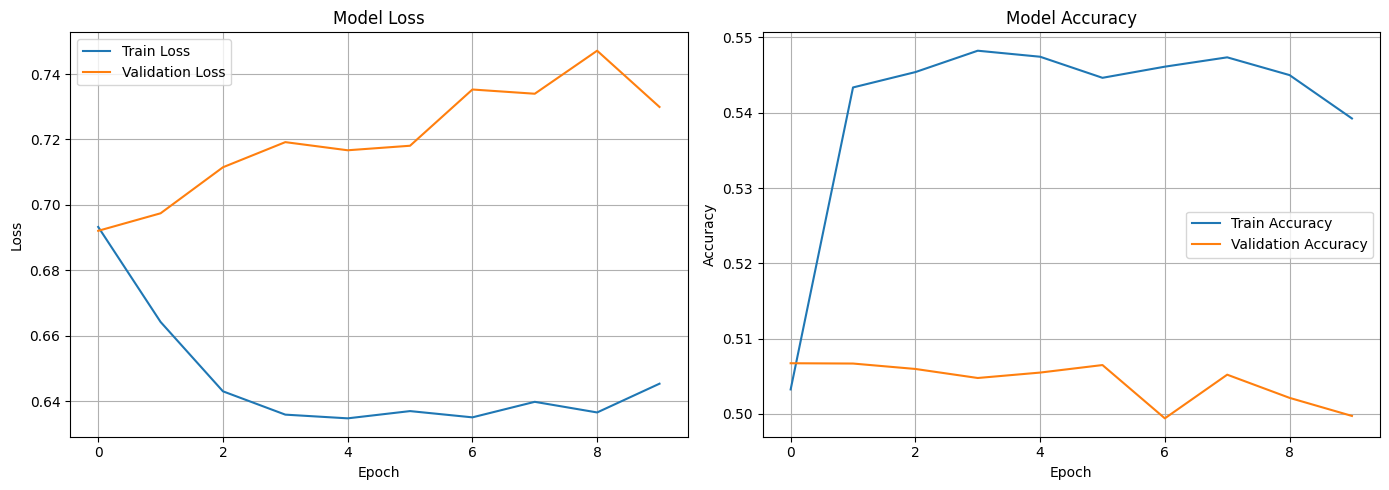

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

-> Model hasn't learned anything. It validation accuracy is the same from where it started. This is the case of underfitting.

<hr>